In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
items = pd.read_csv('C:/Users/arsen/OneDrive/Escritorio/SS21/Data Mining cup/items.csv', sep = '|')
transactions = pd.read_csv('C:/Users/arsen/OneDrive/Escritorio/SS21/Data Mining cup/transactions.csv', sep = '|')

In [4]:
items.head()

,itemID,title,author,publisher,main topic,subtopics
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH]
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]"
2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]"
3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]"
4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]"


In [5]:
transactions.head()

,sessionID,itemID,click,basket,order
0,0,21310,1,0,0
1,1,73018,1,0,0
2,2,19194,1,0,0
3,3,40250,1,0,0
4,4,46107,1,0,0


In [6]:
print('size of items: ',items.shape)
print('size of transactions: ', transactions.shape)

size of items:  (78030, 6)
size of transactions:  (365143, 5)


In [ ]:
items.groupby([['sessionID','itemID']])

In [1]:
items['publisher'].unique()

NameError: name 'items' is not defined

In [19]:
items[['itemID','publisher']].groupby('publisher').count()

,itemID
publisher,
-,1
.,2
1 Plus Publishing & Consulting,1
10 TO 2 CHILDREN'S BOOKS,1
100 Fans,1
...,...
Éditions de la Chaussette,1
Érato Éditions,2
Ökobuch Verlag GmbH,1


In [20]:
items[['itemID','author']].groupby('author').count()

,itemID
author,
'',1
'Nathan Burgoine,1
(Mixtli) Graycloud,1
",Blake Hoena",1
",Charles Dickens",1
...,...
Éric Kennedy,1
Éric Letulle,1
Éric Nieudan,1


In [ ]:
ax = sns.distplot(items[['itemID','author']].groupby('author').count())

plt.xlabel('author', fontsize=18)
plt.ylabel('density', fontsize=16)

In [ ]:
ax = sns.distplot(items[['itemID','publisher']].groupby('publisher').count())
plt.xlabel('publisher', fontsize=18)
plt.ylabel('density', fontsize=16)

In [ ]:
ax = sns.distplot(items[['itemID','main topic']].groupby('main topic').count())
plt.xlabel('main topic', fontsize=18)
plt.ylabel('density', fontsize=16)

In [33]:
count = items['itemID'].value_counts()

In [34]:
count

2047     1
31386    1
12947    1
2708     1
661      1
        ..
58742    1
60791    1
38264    1
40313    1
0        1
Name: itemID, Length: 78030, dtype: int64

In [36]:
transactions.head()

,sessionID,itemID,click,basket,order
0,0,21310,1,0,0
1,1,73018,1,0,0
2,2,19194,1,0,0
3,3,40250,1,0,0
4,4,46107,1,0,0


In [38]:
transactions[transactions['order']>0]

,sessionID,itemID,click,basket,order
21,15,73865,0,0,1
66,54,10666,3,1,1
74,60,809,0,0,1
115,90,38931,1,2,1
129,104,74094,0,0,1
...,...,...,...,...,...
364944,279199,65093,0,0,1
364945,279200,43441,2,1,1
364983,279238,71270,1,1,1
365038,279285,67753,1,1,1


In [2]:
df = transactions[transactions['order']>0][['itemID','order']].groupby('itemID').sum().sort_values('order', ascending=False)

NameError: name 'transactions' is not defined

In [43]:
items[items['itemID']==53695]

,itemID,title,author,publisher,main topic,subtopics
956,53695,"Rico, Oskar und die Tieferschatten (Rico und O...",Andreas Steinhöfel,Carlsen Verlag GmbH,YFCF,"[5AL,1DFG-DE-BE,YFB,YFCF,YFQ]"


In [57]:
def set_subtopic_lenght(x):
    if ',' in str(x):
        return str(x).count(',') + 1
    else:
        return 1

In [58]:
items['subtopic_count']=items['subtopics'].apply(set_subtopic_lenght)

In [60]:
items.head()

,itemID,title,author,publisher,main topic,subtopics,subtopic_count
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],1
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",7
2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]",2
3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]",5
4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]",6


In [ ]:
ax = sns.distplot(items['subtopic_count'], norm_hist=True)
plt.xlabel('sub topics count', fontsize=18)
plt.ylabel('density', fontsize=16)

# Visualizations for the items csv

Text(0.5, 1.0, 'distribution of items per amount of sub topics')

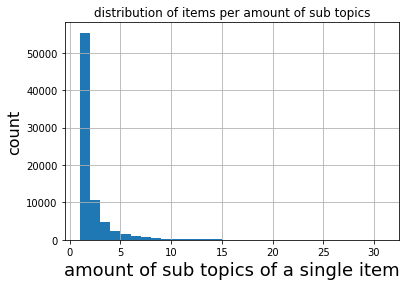

In [94]:
items['subtopic_count'].hist(bins=30)
plt.xlabel('amount of sub topics of a single item', fontsize=18)
plt.ylabel('count', fontsize=16)
plt.title('distribution of items per amount of sub topics')

Text(0.5, 1.0, 'distribution of items per amount of sub topics')

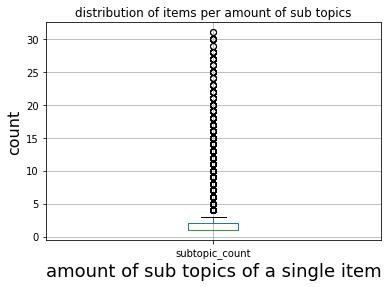

In [110]:
items.boxplot(column=['subtopic_count'])
plt.xlabel('amount of sub topics of a single item', fontsize=18)
plt.ylabel('count', fontsize=16)
plt.title('distribution of items per amount of sub topics')

Text(0.5, 1.0, 'Distribution of items per main topic')

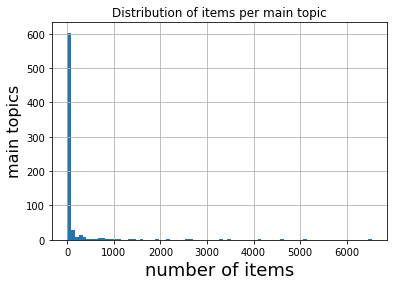

In [100]:
items[['itemID','main topic']].groupby('main topic').count().hist(bins=80)
plt.xlabel('number of items', fontsize=18)

plt.ylabel('main topics', fontsize=16)
plt.title('Distribution of items per main topic')

Text(0.5, 1.0, 'Distribution of items per author')

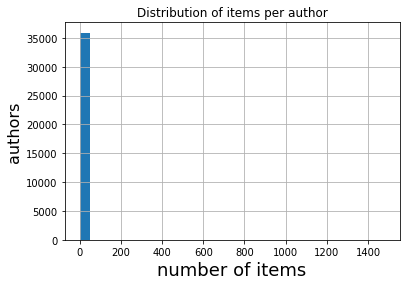

In [105]:
items[['itemID','author']].groupby('author').count().hist(bins=30)
plt.xlabel('number of items', fontsize=18)
plt.ylabel('authors', fontsize=16)
plt.title('Distribution of items per author')

Text(0.5, 1.0, 'Distribution of items per author')

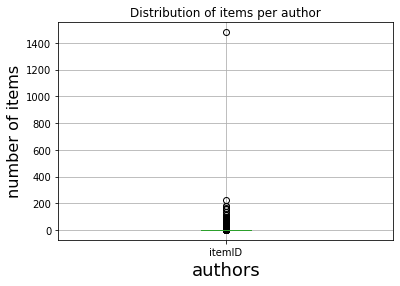

In [107]:
items[['itemID','author']].groupby('author').count().boxplot()
plt.xlabel('authors', fontsize=18)
plt.ylabel('number of items', fontsize=16)
plt.title('Distribution of items per author')

Text(0.5, 1.0, 'Distribution of items per publishers')

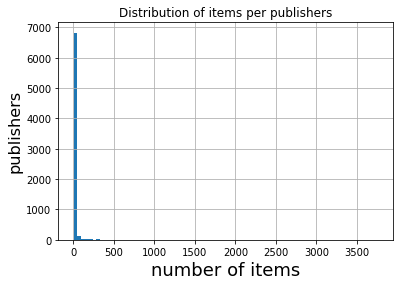

In [101]:
items[['itemID','publisher']].groupby('publisher').count().hist(bins=80)
plt.xlabel('number of items', fontsize=18)

plt.ylabel('publishers', fontsize=16)
plt.title('Distribution of items per publishers')

Text(0.5, 1.0, 'Distribution of items per publisher')

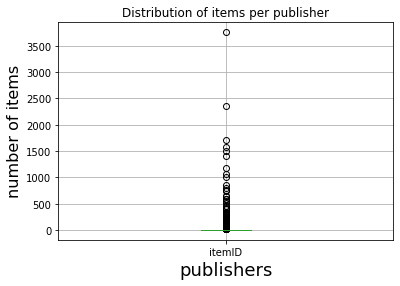

In [108]:
items[['itemID','publisher']].groupby('publisher').count().boxplot()
plt.xlabel('publishers', fontsize=18)
plt.ylabel('number of items', fontsize=16)
plt.title('Distribution of items per publisher')

# Visualizations for transactions

excluding all the rows that did not end up in an order

In [71]:
transactions2 = transactions[transactions['order']>0]

In [127]:
print('total sales: ',transactions2['order'].sum())

total sales:  17674


In [72]:
transactions2.shape

(16906, 5)

In [73]:
transactions2.head()

,sessionID,itemID,click,basket,order
21,15,73865,0,0,1
66,54,10666,3,1,1
74,60,809,0,0,1
115,90,38931,1,2,1
129,104,74094,0,0,1


In [75]:
transactions2[['itemID','click','basket','order']].groupby('itemID').sum()

,click,basket,order
itemID,,,
18,0,0,1
54,0,0,1
68,0,0,1
77,4,3,3
108,0,1,1
...,...,...,...
78996,0,0,4
79014,1,2,4
79044,0,0,1


In [82]:
x=transactions2[['sessionID','itemID']].groupby('sessionID').count()

In [83]:
x

,itemID
sessionID,
15,1
54,1
60,1
90,1
104,3
...,...
279199,6
279200,1
279238,1


In [84]:
max(x['itemID'])

21

In [88]:
items['main topic'].describe()

count     77772
unique      699
top          FM
freq       6536
Name: main topic, dtype: object

In [ ]:
ax = sns.distplot(items[['itemID','publisher']].groupby('publisher').count())

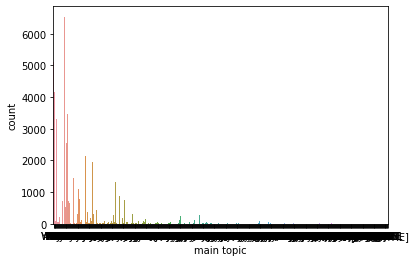

In [90]:
ax=sns.countplot(items['main topic'])

merging items.csv and transactions.csv to bring topic information to the transactions

In [117]:
new_transactions = transactions.merge(items[['main topic','itemID','subtopics']], on='itemID')

Text(0.5, 1.0, 'Distribution of sales per main topic')

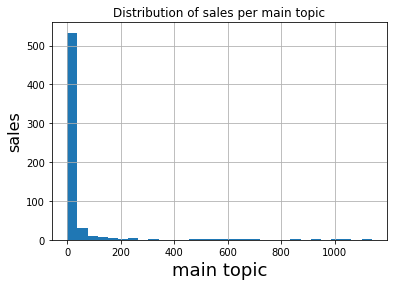

In [124]:
new_transactions[['main topic','order']].groupby('main topic').sum().hist(bins=30
                                                                         )
plt.xlabel('main topic', fontsize=18)
plt.ylabel('sales', fontsize=16)
plt.title('Distribution of sales per main topic')

Text(0.5, 1.0, 'Distribution of sales per main topic')

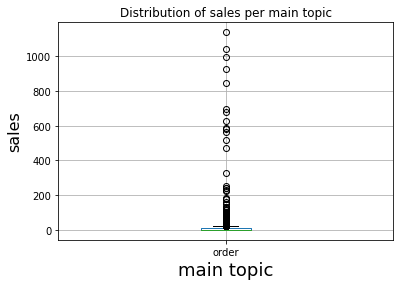

In [120]:
new_transactions[['main topic','order']].groupby('main topic').sum().boxplot()
plt.xlabel('main topic', fontsize=18)
plt.ylabel('sales', fontsize=16)
plt.title('Distribution of sales per main topic')

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install jupyterthemes
pip install --upgrade jupyterthemes

SyntaxError: invalid syntax (<ipython-input-24-d1c641e4ce7d>, line 1)

In [1]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [2]:
!jt -t chesterish